# 目的
这里是对MYD06_L2 的数据读取方式和识别方式进行探索  
[数据说明](https://atmosphere-imager.gsfc.nasa.gov/products/cloud/format-content)  
[数据格式含义](https://atmosphere-imager.gsfc.nasa.gov/sites/default/files/ModAtmo/MOD06_L2_CDL_fs.txt)

In [1]:
import h5py
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pyhdf     # 
#  说明   https://github.com/fhs/pyhdf
#  Document 
# https://hdfeos.org/software/pyhdf.php
from pyhdf.SD import SD
import matplotlib.pyplot as plt

In [12]:
#hdf = SD('D:\DCCData\VFNStandard\Model2VFMStandard\CAL_LID_L2_VFM-Standard-V4-20.2018-08-05T16-02-35ZN_Subset.hdf')
#hdf = SD('D:\DCCData\MODISCloudProperties\MYD06_L2\MYD06_L2.A2018217.0540.061.2018220201943.hdf')

hdf = SD('D:\DCCData\AGRIMODISVFM\MYD06_L2.A2018313.0400.061.2018313195412.hdf')
    

#  这组数据是中国区上空的 
#  使用例子 搜索  http://hdfeos.org/zoo 
# 经度范围  [73,150]
# 维度范围  [4,55]

# data = hdf.datasets()      # 这个方法在这里展示不全。。。
# for i in data:
#     print(i)  # 具体类别
#     img = hdf.select(i)[:]  # 图像数据
#     plt.imshow(img, cmap='gray')  # 显示图像
#     plt.show()

In [4]:
#List available SDS datasets.
print(hdf.datasets())

{'Latitude': (('Cell_Along_Swath_5km:mod06', 'Cell_Across_Swath_5km:mod06'), (406, 270), 5, 0), 'Longitude': (('Cell_Along_Swath_5km:mod06', 'Cell_Across_Swath_5km:mod06'), (406, 270), 5, 1), 'Scan_Start_Time': (('Cell_Along_Swath_5km:mod06', 'Cell_Across_Swath_5km:mod06'), (406, 270), 6, 2), 'Solar_Zenith': (('Cell_Along_Swath_5km:mod06', 'Cell_Across_Swath_5km:mod06'), (406, 270), 22, 3), 'Solar_Zenith_Day': (('Cell_Along_Swath_5km:mod06', 'Cell_Across_Swath_5km:mod06'), (406, 270), 22, 4), 'Solar_Zenith_Night': (('Cell_Along_Swath_5km:mod06', 'Cell_Across_Swath_5km:mod06'), (406, 270), 22, 5), 'Solar_Azimuth': (('Cell_Along_Swath_5km:mod06', 'Cell_Across_Swath_5km:mod06'), (406, 270), 22, 6), 'Solar_Azimuth_Day': (('Cell_Along_Swath_5km:mod06', 'Cell_Across_Swath_5km:mod06'), (406, 270), 22, 7), 'Solar_Azimuth_Night': (('Cell_Along_Swath_5km:mod06', 'Cell_Across_Swath_5km:mod06'), (406, 270), 22, 8), 'Sensor_Zenith': (('Cell_Along_Swath_5km:mod06', 'Cell_Across_Swath_5km:mod06'), (4

In [17]:
SD.end(hdf) 

# 'Cloud_Multi_Layer_Flag'
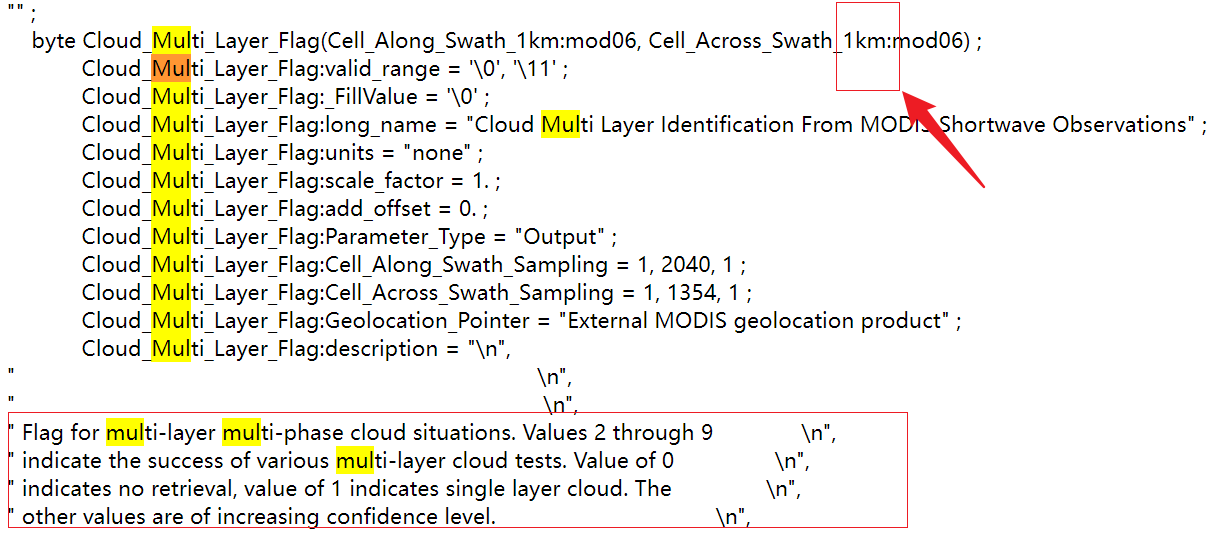

In [13]:
CMLF= hdf.select('Cloud_Multi_Layer_Flag')
CloudMultiLayerFlag= CMLF[:,:]

In [14]:
np.unique(CloudMultiLayerFlag)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [15]:
CloudMultiLayerFlag.shape

(2030, 1354)

<!-- ### 选定要提出的数据
1、 非 --- 陆地，海岛，海岸线  
2、白天数据  
3、 -->

# [具体数据含义的说明,数据手册](https://atmosphere-imager.gsfc.nasa.gov/products/cloud/file-spec)

    " The values in this SDS indicate the following cloud phase:                         \n",
    " 0 -- cloud free                                                                    \n",
    " 1 -- water cloud                                                                   \n",
    " 2 -- ice cloud                                                                     \n",
    " 3 -- mixed phase cloud                                                             \n",
    " 6 -- undetermined phase                                                            \n",

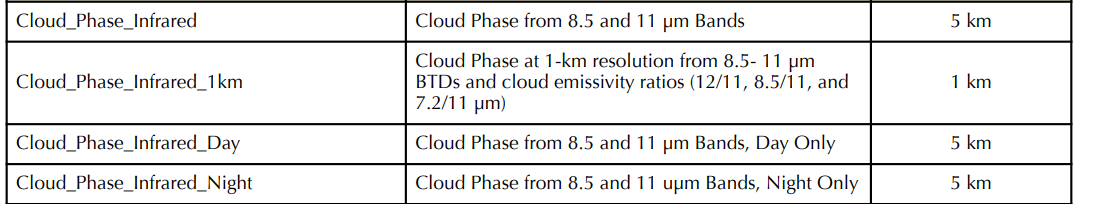

In [113]:
CPID = hdf.select('Cloud_Phase_Infrared_Day')
CloudPhaseInfraredDay = CPID[:,:]

In [114]:
CloudPhaseInfraredDay .shape

(406, 270)

In [137]:
CM5 = hdf.select('Cloud_Mask_5km')
CloudMask5km= CM5[:,:]
np.unique(CloudMask5km)

array([-107, -106,  -91,  -59,   -7,   -3,    0,   41,   43,   45,   47,
         57,   59,   61,   63,  121,  123,  125,  127], dtype=int8)

In [ ]:
maskVals=CloudMask5km&7

`只有         001            011              101                           111
 有意义      cloudy     Uncertain     Probably  Clear       Confident  Clear
                     1               3                  5                                7`

In [16]:
COT = hdf.select('Cloud_Optical_Thickness')
CloudOpticalThickness= COT[:,:]
CloudOpticalThickness.shape
#CloudOpticalThickness.min(),CloudOpticalThickness.max()
# :_FillValue = -9999s  
# Cloud_Optical_Thickness:scale_factor = 0.009999999776482582 ;

(2030, 1354)

In [142]:
100/0.009999999776482582

10000.000223517423

In [ ]:
np.multiply(raw_data, scale_factor)

a




`  
'Cloud_Top_Temperature'  

'Cloud_Phase_Infrared'  
'Cloud_Phase_Infrared_Night'  
'Cloud_Phase_Infrared_Day'  
'Cloud_Phase_Infrared_1km'  
      
'Cloud_Water_Path'   ------ 液态水路径-以g /m²为单位，是对大气中两点之间液态水总量的度量。LWP是了解大气中辐射传递的重要量。它定义为大气中两点之间液态水含量的积分。
'Cloud_Water_Path_PCL'  
'Cloud_Water_Path_1621'  
'Cloud_Water_Path_1621_PCL'  
'Cloud_Water_Path_16'  
'Cloud_Water_Path_37'  `

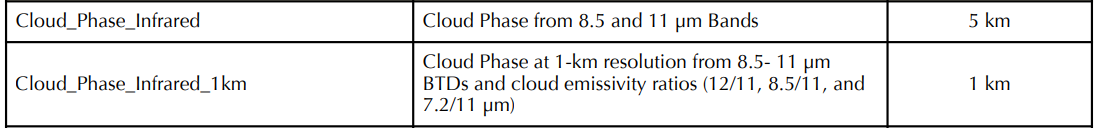
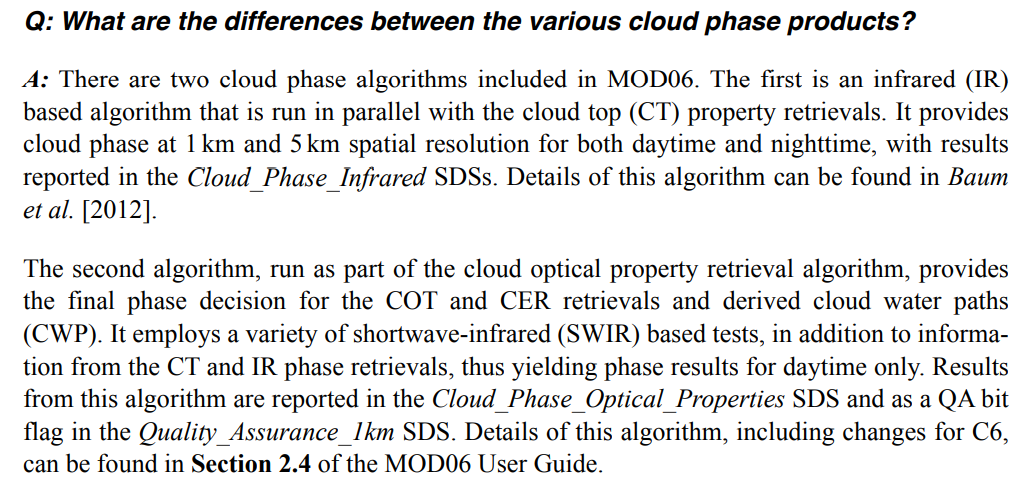
[C6MOD06OPUserGuide](https://modis-images.gsfc.nasa.gov/_docs/C6MOD06OPUserGuide.pdf)

In [36]:
# Read geolocation dataset.
lat = hdf.select('Latitude')
latitude = lat[:,:]
lon = hdf.select('Longitude')
longitude = lon[:,:]

In [37]:
latitude.shape,longitude.shape

((406, 270), (406, 270))

In [38]:
406*5

2030

In [39]:
longitude.min(),longitude.max(),latitude.min(),latitude.max()
# 

(126.10793, 152.48839, 11.633151, 32.55632)

# 借助 ARGI 数据 绘制投影图
1、查看这个经纬度范围是否，包含有，空白视角区域【AGRI 定标后，非地球的空白区】  
2、同时判定这幅图的背景是否包含陆地，因为后面做 Cloud Phase 辨识的时候我的算法暂时后没有包含使用，陆地情况的e，要扣除陆地区域   
3、判定是否在白天  

In [64]:
from pyhdf.SD import SD, SDC  
hdf = SD('D:/DCCData/VFNStandard/fygatNAV.FengYun-4A.xxxcgms.4km104.hdf',SDC.READ)
# --- 读取方式有所改进 ！！
data = hdf.datasets()

lon = hdf.select('pixel_longitude')
longitude = lon[:,:]

lat = hdf.select('pixel_latitude')
latitude = lat[:,:]


pcm = hdf.select('pixel_coast_mask')
coastMask = pcm[:,:]

SD.end(hdf) 
array1 =  longitude
# array
a=array1.reshape(1,7551504)
#print(a)
#print(find_nearest(a, value1))
a = np.asarray(a)


array2 =  latitude
# array
b=array2.reshape(1,7551504)
#print(b)
#print(find_nearest(a, value1))
b = np.asarray(b)

In [61]:
# Best match latitude and longitude and its coordinates

def bllc(lon,lat):

    loValue=lon
    laValue=lat

    #  实现经纬度 误差之和最小，最近匹配 ！！
    #idx = (np.abs(a - loValue)+np.abs(b - laValue)).argmin()
    # 实现 欧氏距离最短匹配
    idx =(pow(a - loValue,2)+pow(b - laValue,2)).argmin() 
    
    idx
    print(a[0,idx],b[0,idx])
    cord=np.where((longitude == a[0,idx])&(latitude == b[0,idx]))   # 直接匹配是没有值的 ！
    print(cord[0][0],cord[1][0])

    return cord[0][0],cord[1][0]

In [62]:
# best matching coordinates

def bmc(lon1,lon2,lat1,lat2):
    
    """ lon1< lon2  and   lat1< lat2    """
    #  --------------------  左上
    x1,y1=bllc(lon1,lat2)
    #  --------------------  右上
    x2,y2=bllc(lon2,lat2)
    #  --------------------  左下
    x3,y3=bllc(lon1,lat1)
    #  --------------------  右下
    x4,y4=bllc(lon2,lat1)
    
    #max(x1,x2,x3,x4)
    #min(x1,x2,x3,x4)
    
    #max(y1,y2,y3,y4)
    #min(y1,y2,y3,y4)
    print(min(x1,x2,x3,x4),max(x1,x2,x3,x4),min(y1,y2,y3,y4),max(y1,y2,y3,y4))
    return 

In [63]:
# --- 找到给定 经纬度范围，上的横纵坐标范围
bmc(126.10793, 152.48839, 11.633151, 32.55632)

126.11027 32.566246
555 1846
152.45782 32.54069
588 2295
126.10302 11.623905
1060 1934
152.51099 11.62371
1075 2459
555 1075 1846 2459


 **这里是随便选的数据，不用管**

In [65]:
import h5py
file= h5py.File('D:\DCCData\AGRIMODISVFM\AGRI\AGRI2018110303.h5','r') 
d5 = file['/C5'] # 使用 通道5，这样既可以观测观测区域是否是在白天，
DataBS5= np.asarray(d5)
DataBS5 = DataBS5[555 :1075, 1846:2459]

In [81]:
coastMask =coastMask [555 :1075, 1846:2459]
CM =pd.DataFrame(coastMask).replace(0., np.nan)
CM =pd.DataFrame(CM).replace(-1,np.nan)
CM= np.asarray(CM)
print(np.unique(CM)) 

[]


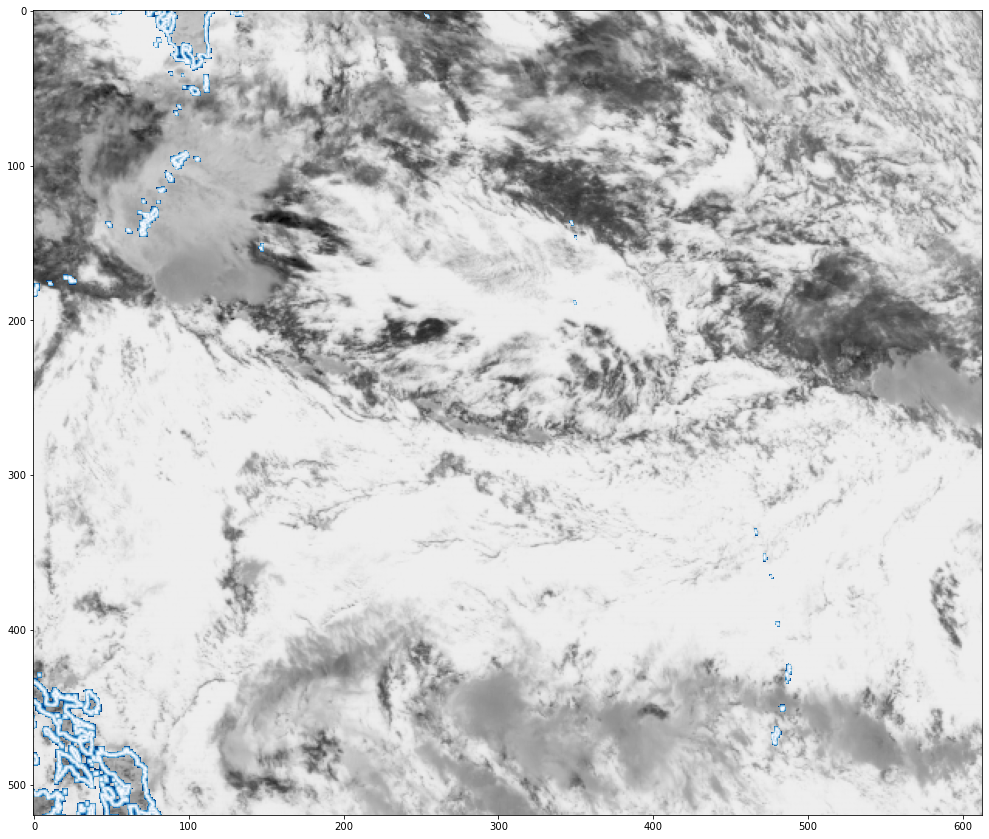

In [80]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
plt.figure(figsize=(17,17))  # first !!
# Layer images above one another using alpha blending   
im1 = plt.imshow(DataBS5,cmap = plt.cm.binary, alpha=1)  # inferno
im2= plt.imshow(CM,cmap = plt.cm.Blues)  # inferno
plt.show()

### 当查看到出现视角区域中出现，空值，
则需要**不断调整上面的的图像，横纵坐标范围**，调整截取的 图像范围。找到合适的视角范围后，再查看 AGRI 的经纬度范围和最适，视角范围。

# 数据选取

In [115]:
# # Read geolocation dataset.
# CPI = hdf.select('Cloud_Phase_Infrared')  # (5km dataset)
# CPIData= CPI[:,:]  
# CPI1km = hdf.select('Cloud_Phase_Infrared_1km')
# CPI1kmData = CPI1km[:,:]

CPID = hdf.select('Cloud_Phase_Infrared_Day')
CPIDay = CPID[:,:]
CPIDay.shape

(406, 270)

In [118]:
np.unique(CPIDay)

array([0, 1, 2, 4, 6], dtype=int8)

这个 127 我暂时没有读懂呀 。。。认为这里就是被辨识为黑夜的地方吧

In [122]:
# CPI1kmData.shape

In [96]:
SD.end(hdf) 
#   end access to the SD interface and close the HDF file
#  http://fhs.github.io/pyhdf/modules/SD.html

In [123]:
#CPIData.shape,CPI1kmData.shape,CPIDay.shape

In [124]:
#CPIData[50:60,:]

In [45]:
# pip install seaborn

# 绘图
[reference1](https://clouds.eos.ubc.ca/~phil/courses/eosc582/html/cloud_phase.html)

# Cloud_Phase_Infrared
Description: Cloud Phase Infrared  
Dimensions: (Cell_Along_Swath_5km, Cell_Across_Swath_5km)  
Valid Range: (byte array) clear = 0; liquid water clouds = 1; ice clouds = 2; undetermined phase clouds = 6.   
(Note there are no mixed phase clouds (=3) in C6 and later)  

In [119]:
# hit=CPI1kmData==6
# CPI1kmData[hit]=4


hit=CPIDay==127
CPIDay[hit]=4
hit=CPIDay==6
CPIDay[hit]=4

In [129]:
hitwater=CPIDay==1
CPIDayWater=CPIDay[hitwater]

In [132]:
np.unique(CPIDayWater),CPIDayWater.shape,hitwater.shape

(array([1], dtype=int8), (58250,), (406, 270))

## pick our five colors from the seaborn xkcd database
Create a 5 color ListedColormap with the named colors

In [120]:
import seaborn as sns
from matplotlib.colors import ListedColormap
# colors = ["oldlace", "lime", "cyan", "darkturquoise", "snow"]
# # oldlace   ["royal blue", "baby blue", "eggshell", "burnt red", "soft pink"]
# print([the_color for the_color in colors])
# colors=[sns.xkcd_rgb[the_color] for the_color in colors]
# pal=ListedColormap(colors,N=5)

import matplotlib as mpl
from matplotlib import colors
cmap = mpl.colors.ListedColormap( ["oldlace", "lime", "cyan", "darkturquoise", "snow"])  

## plot the raw unprojected image for reference

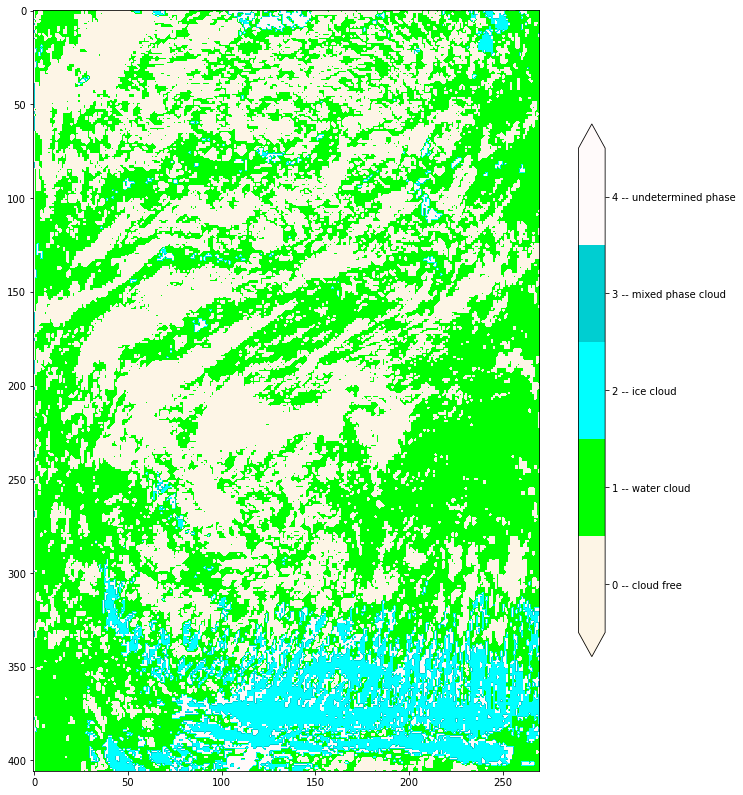

In [133]:
import matplotlib
%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(14,14))
CS=ax.imshow(    CPIDay   ,cmap=cmap) # 数据加入的位置
cax,kw = matplotlib.colorbar.make_axes(ax,location='right',pad=0.05,shrink=0.7)
cax=fig.colorbar(CS,cax=cax,extend='both',**kw);
labels='0 -- cloud free,1 -- water cloud,2 -- ice cloud,3 -- mixed phase cloud,4 -- undetermined phase'
labels=labels.split(',')
ends=np.linspace(0,4,6)
centers=(ends[1:] + ends[:-1])/2.
cax.set_ticks(centers)
cax.set_ticklabels(labels)

# 下采样
从图像经度上看这个 CloudPhase 产品也是精度为 1km 的

In [50]:
x = range(latitude.shape[0])
y = range(latitude.shape[1]) 
Storage=np.zeros( (latitude.shape[0],latitude.shape[1]))

In [51]:
for i in x:
    for j in y:
        Storage[i,j]=CPI1kmData[i*5,j*5]    

In [52]:
# import matplotlib
# %matplotlib inline
# fig, ax = plt.subplots(1,1,figsize=(14,14))
# CS=ax.imshow(Storage,cmap=cmap)
# cax,kw = matplotlib.colorbar.make_axes(ax,location='right',pad=0.05,shrink=0.7)
# cax=fig.colorbar(CS,cax=cax,extend='both',**kw);
# labels='0 -- cloud free,1 -- water cloud,2 -- ice cloud,3 -- mixed phase cloud,4 -- undetermined phase'
# labels=labels.split(',')
# ends=np.linspace(0,4,6)
# centers=(ends[1:] + ends[:-1])/2.
# cax.set_ticks(centers)
# cax.set_ticklabels(labels)

## 数据观测范围裁切 和存储

In [53]:
StorageCM = Storage # [150: 300, 100: 380]
lona=longitude#[150: 300, 100: 380]
lata=latitude#[150: 300, 100: 380]

In [54]:
StorageCM.shape,lata.shape,lona.shape

((406, 270), (406, 270), (406, 270))

In [55]:
print(np.unique(StorageCM)) 

[0. 1. 2. 4.]


In [56]:
lona.min(),lona.max(),lata.min(),lata.max()

(126.10793, 152.48839, 11.633151, 32.55632)

In [57]:
lona=np.array(lona)
lata=np.array(lata)
StorageCM=np.array(StorageCM)

lona=lona.reshape(-1,1)
lata=lata.reshape(-1,1)
StorageCM=StorageCM.reshape(-1,1)

lona=pd.DataFrame(lona)
lata=pd.DataFrame(lata)
StorageCM=pd.DataFrame(StorageCM)

lona.reset_index(drop=True, inplace=True)
lata.reset_index(drop=True, inplace=True)
StorageCM.reset_index(drop=True, inplace=True)

Df3 = pd.concat([lona,lata,StorageCM],axis=1)
Df3.columns=['MODISLongitude', 'MODISLatitude','MODISPhase']
print(Df3.shape)
Df3.head(5)

(109620, 3)


,MODISLongitude,MODISLatitude,MODISPhase
0,152.488388,14.605063,0.0
1,152.274384,14.584328,1.0
2,152.068268,14.564167,1.0
3,151.869446,14.544548,1.0
4,151.677505,14.525442,1.0


In [58]:
Df3.to_csv('201811090400MODISCloudPhase.csv', index=False)